# Lab 1

## Part 2

### Packages installed

In [21]:
install.packages(c("ggplot2", "reshape2", "ggmap", "maptools", "maps", "sp"))

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"packages 'ggplot2', 'reshape2', 'ggmap', 'maptools', 'maps', 'sp' are in use and will not be installed"

## Graph 1

### Influenza National Summary 2018-2019

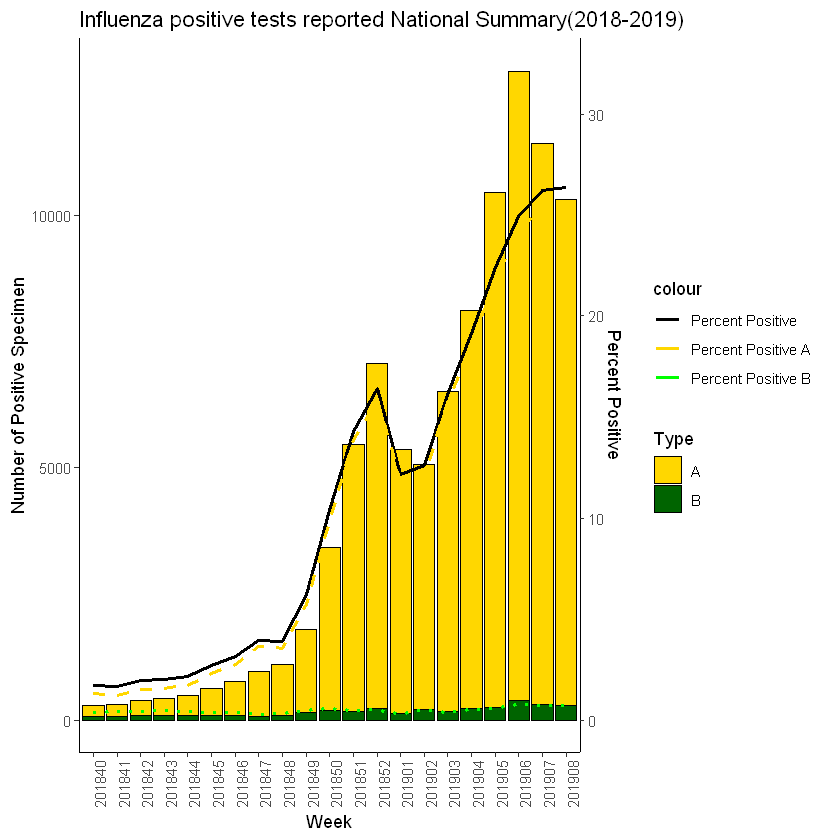

In [24]:
library("ggplot2")

csv_data <- read.csv("./data/positives.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data <- subset(csv_data, select = c("Week", "Total.A", "Total.B", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))

A_data <- subset(csv_data, select = c("Week", "Total.A", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))
colnames(A_data) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
A_data$Type <- rep("A", nrow(A_data))

B_data <- subset(csv_data, select = c("Week", "Total.B", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))
colnames(B_data) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
B_data$Type <- rep("B", nrow(A_data))

my_data <- rbind(A_data, B_data)
my_data$Week <- as.factor(my_data$Week)

ggplot(data = my_data, aes(x = Week)) + 
  geom_bar(aes(y = Total, fill = Type), position = "stack", stat = "identity", color = "black") +
  geom_line(aes(y = PercentPositive * 400, group = 1, colour = "Percent Positive"), size = 1) +
  scale_y_continuous(sec.axis = sec_axis(~./400, name = "Percent Positive")) +
  geom_line(aes(y = PercentPositiveA * 400, group = 1, colour = "Percent Positive A"), linetype = "dashed", size = 1) +
  geom_line(aes(y = PercentPositiveB * 400, group = 1, colour = "Percent Positive B"), linetype = "dotted", size = 1) +
  scale_color_manual(values = c("black", "gold", "green")) +
  scale_fill_manual(values = c('gold','darkgreen')) +
  theme_classic() +
  labs(x = "Week", y ="Number of Positive Specimen", title = "Influenza positive tests reported National Summary(2018-2019)") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Graph 2

### Positive Tested 2018-2019

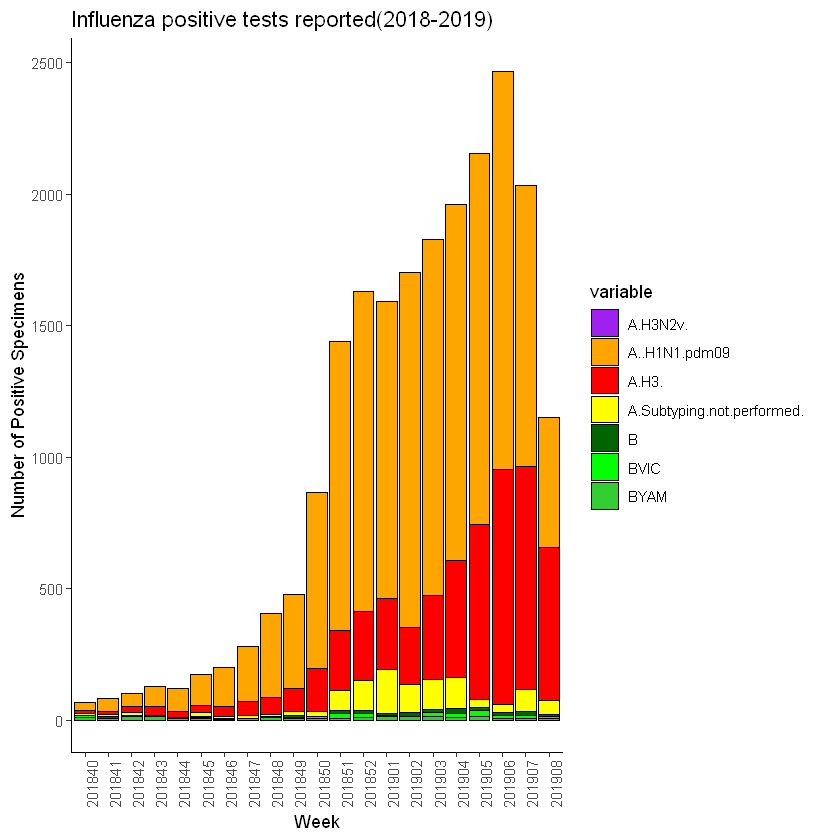

In [25]:
library(reshape2)
library(ggplot2)

csv_data <- read.csv("./data/positivetypes.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data <- melt(csv_data[, c("Week", "A.H3N2v.", "A..H1N1.pdm09", "A.H3.", "A.Subtyping.not.performed.", "B", "BVIC", "BYAM")], id.vars = 1)
my_data$Week <- as.factor(my_data$Week)

ggplot(data = my_data, aes(x = Week)) +
  geom_bar(aes(y = value, fill = variable), position = "stack", stat = "identity", color = "black") +
  scale_fill_manual(values = c("purple", "orange", "red", "yellow", "darkgreen", "green", "limegreen")) +
  labs(y = "Number of Positive Specimens", title = "Influenza positive tests reported(2018-2019)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Graph 3

### Mortality 2014-2019

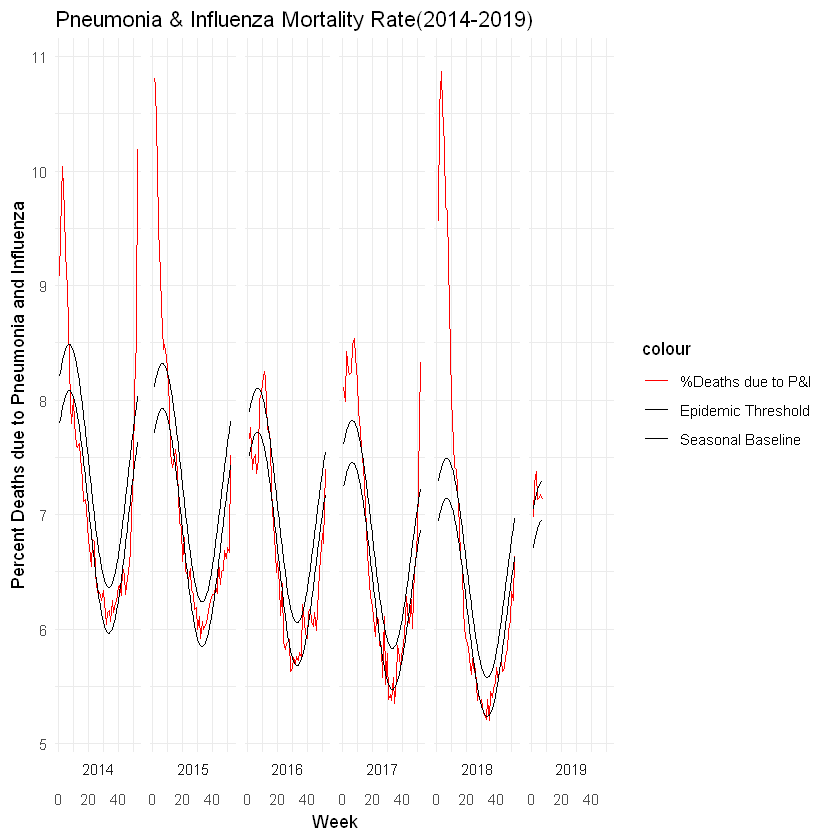

In [26]:
library(reshape2)
library(ggplot2)

csv_data <- read.csv("./data/mortality.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
colnames(csv_data) <- c("Year", "Week", "PercentDeathsPneumoniaInfluenza", "Expected", "Threshold", "AllDeaths", "PneumoniaDeaths", "InfluenzaDeaths")
my_data <- subset(csv_data, select = c("Year", "Week", "PercentDeathsPneumoniaInfluenza", "Expected", "Threshold"))

ggplot(data = my_data, aes(x = Week)) +
  geom_line(aes(y = PercentDeathsPneumoniaInfluenza, group = 1, color = "%Deaths due to P&I"), size = 0.1) +
  geom_line(aes(y = Expected, group = 1, color = "Seasonal Baseline")) +
  geom_line(aes(y = Threshold, group = 1, color = "Epidemic Threshold")) +
  facet_wrap(~Year, nrow = 1, strip.position = "bottom") +
  theme_minimal() +
  scale_color_manual(values = c("red", "black", "black")) +
  labs(y = "Percent Deaths due to Pneumonia and Influenza", title = "Pneumonia & Influenza Mortality Rate(2014-2019)")



## Graph 4

### Influenza-like Illness 2009-2019

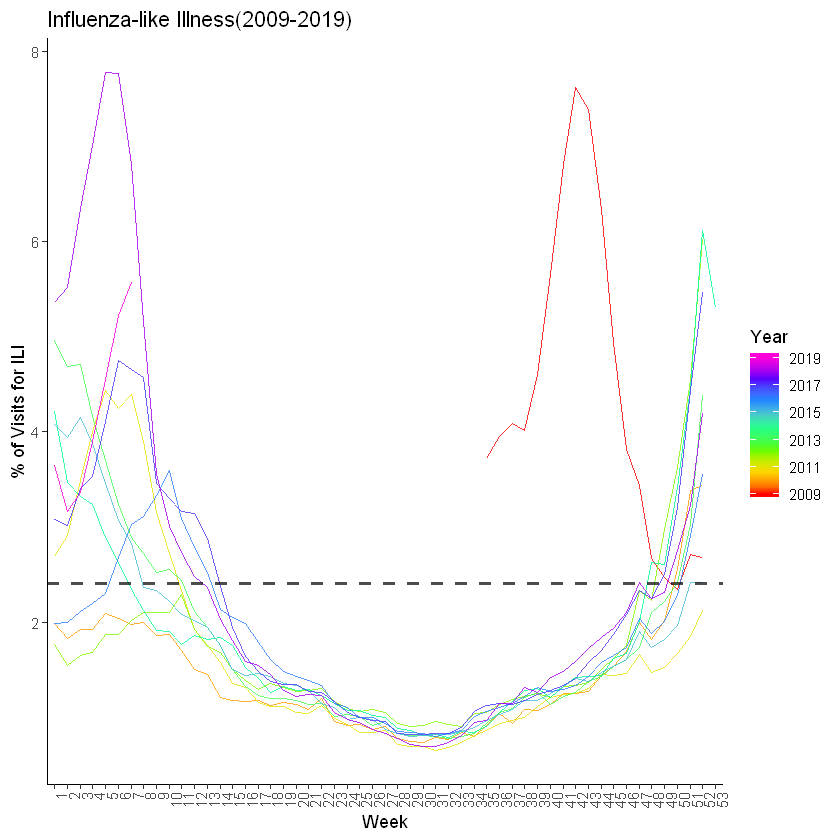

In [27]:
library(reshape2)
library(ggplot2)

csv_data <- read.csv(file = "./data/ili.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data <- csv_data$X.UNWEIGHTED.ILI
Week <- as.factor(csv_data$WEEK)
Year <- csv_data$YEAR

ggplot(data = csv_data, aes(x = Week, y = my_data, group = Year)) +
  geom_line(aes(color = Year), alpha = 0.8) +
  geom_hline(yintercept = 2.4, size = 1, linetype = "dashed", alpha = 0.7) +
  scale_color_gradientn(colours = rainbow(7)) +
  theme_classic() +
  labs(y = "% of Visits for ILI", title = "Influenza-like Illness(2009-2019)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


## Graph 5

### Heat Map of USA 2018-2019

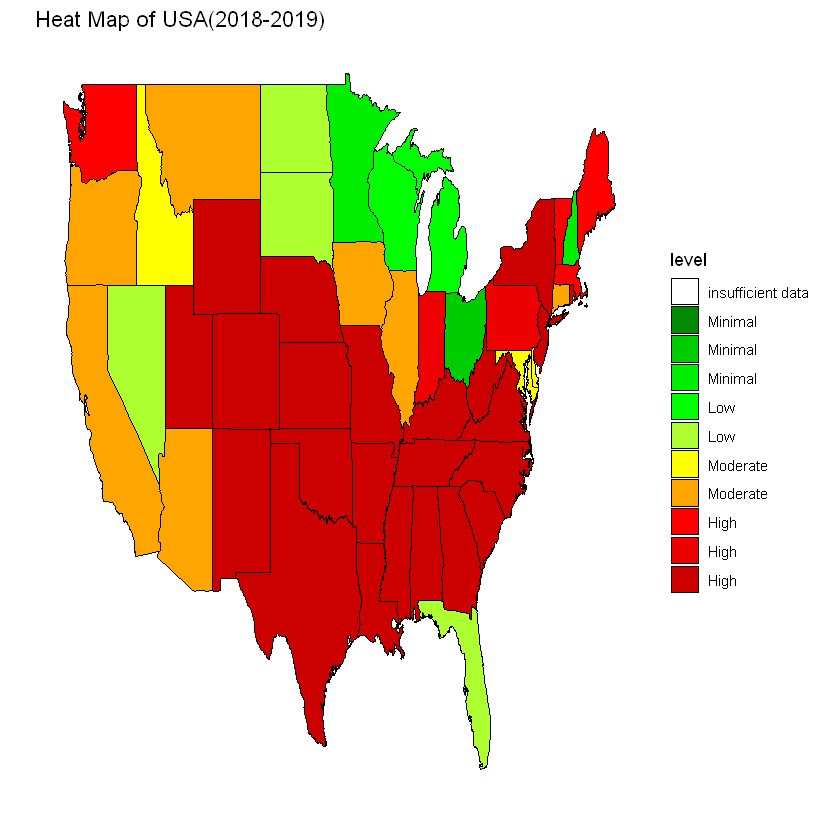

In [28]:
library(ggplot2)
library(ggmap)
library(maptools)
library(maps)
library(reshape2)
library(sp)

csv_data <- read.csv("./data/heatmap.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data = data.frame(region = tolower(csv_data$STATENAME), level = csv_data$ACTIVITY.LEVEL, stringsAsFactors = F)
my_data[,2] <- substring(my_data[,2], 6, 8)
my_data$level <- (as.numeric(my_data$level) + 10)
my_data$level <- (as.character(my_data$level))
states_map <- map_data("state")

ggplot(data = my_data, aes(map_id = region)) + 
  geom_map(aes(fill = level), map = states_map ,colour = "black") +
  scale_fill_manual(values = c("white","green4", "green3", "green2","green1", "greenyellow","yellow", "orange","red1", "red2", "red3"),labels = c("insufficient data", "Minimal", "Minimal", "Minimal", "Low", "Low", "Moderate", "Moderate", "High", "High", "High")) +
  theme_classic() +
  labs(title = "Heat Map of USA(2018-2019)", x = "", y = "") +
  expand_limits(x = states_map$long, y = states_map$lat) +
  theme(axis.line = element_blank(), axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks.x = element_blank(), axis.ticks.y = element_blank())

## Graph 6

### Influenza National Summary for 2018

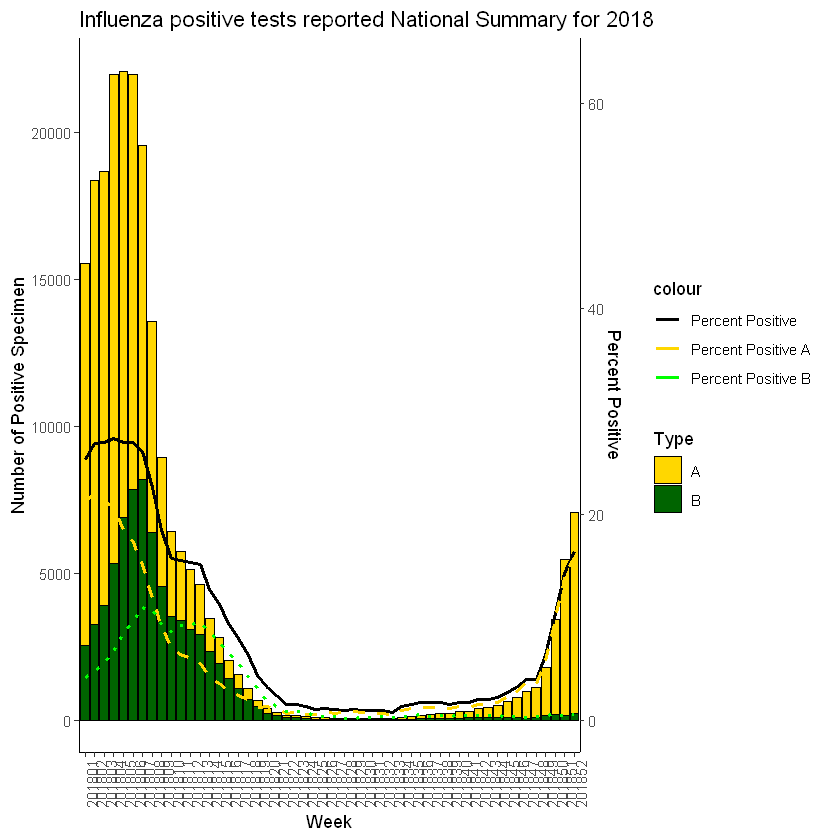

In [33]:
library("ggplot2")

csv_data <- read.csv("./data/annual_positives.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data <- subset(csv_data, select = c("Week", "Total.A", "Total.B", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))

A_data <- subset(csv_data, select = c("Week", "Total.A", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))
colnames(A_data) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
A_data$Type <- rep("A", nrow(A_data))

B_data <- subset(csv_data, select = c("Week", "Total.B", "Percent.Positive", "Percent.Positive.A", "Percent.Positive.B"))
colnames(B_data) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
B_data$Type <- rep("B", nrow(A_data))

my_data <- rbind(A_data, B_data)
my_data$Week <- as.factor(my_data$Week)

ggplot(data = my_data, aes(x = Week)) + 
  geom_bar(aes(y = Total, fill = Type), position = "stack", stat = "identity", color = "black") +
  geom_line(aes(y = PercentPositive * 350, group = 1, colour = "Percent Positive"), size = 1) +
  scale_y_continuous(sec.axis = sec_axis(~./350, name = "Percent Positive")) +
  geom_line(aes(y = PercentPositiveA * 350, group = 1, colour = "Percent Positive A"), linetype = "dashed", size = 1) +
  geom_line(aes(y = PercentPositiveB * 350, group = 1, colour = "Percent Positive B"), linetype = "dotted", size = 1) +
  scale_color_manual(values = c("black", "gold", "green")) +
  scale_fill_manual(values = c('gold','darkgreen')) +
  theme_classic() +
  labs(x = "Week", y ="Number of Positive Specimen", title = "Influenza positive tests reported National Summary for 2018") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Graph 7

### Positive Tested for 2018

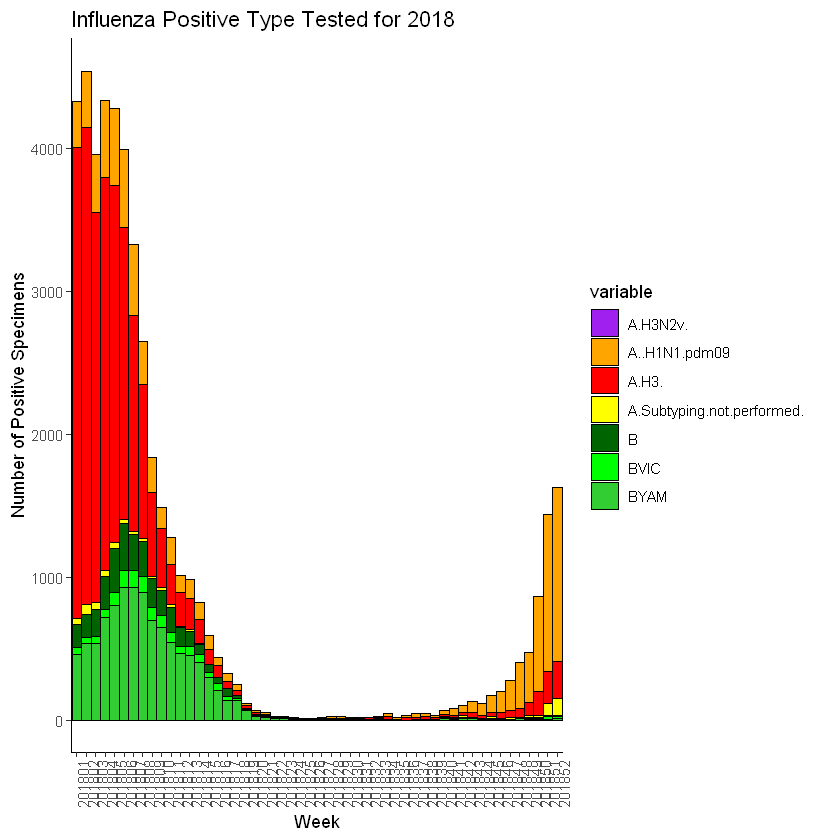

In [37]:
library(reshape2)
library(ggplot2)

csvData <- read.csv("./data/annual_positivetypes.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
myData <- melt(csvData[, c("Week", "A.H3N2v.", "A..H1N1.pdm09", "A.H3.", "A.Subtyping.not.performed.", "B", "BVIC", "BYAM")], id.vars = 1)
myData$Week <- as.factor(myData$Week)

ggplot(data = myData, aes(x = Week)) +
  geom_bar(aes(y = value, fill = variable), position = "stack", stat = "identity", width = 1, color = "black") +
  theme_classic() +
  scale_fill_manual(values = c("purple", "orange", "red", "yellow", "darkgreen", "green", "limegreen")) +
  labs(y = "Number of Positive Specimens", title = "Influenza Positive Type Tested for 2018") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Graph 8

### Influenza New York State Summary in 2018 

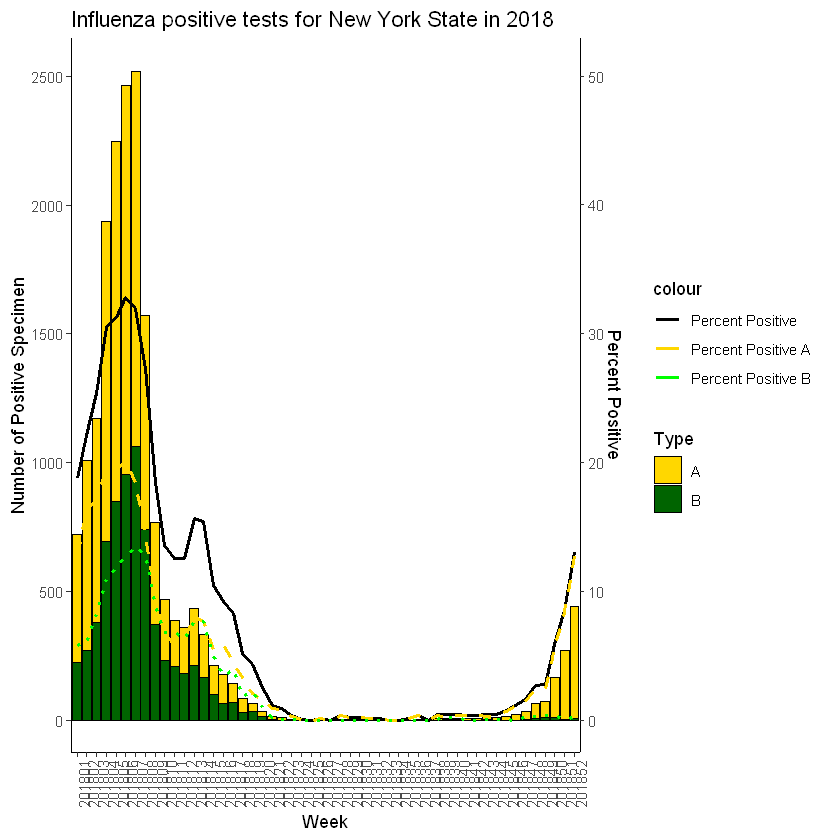

In [1]:
library("ggplot2")

csv_data <- read.csv("./data/positives_NY.csv", header = T, fileEncoding = "UTF-8", sep = ",", as.is = T, stringsAsFactors = F)
my_data <- subset(csv_data,select = c("Week","TOTAL.SPECIMENS", "TOTAL.A", "TOTAL.B", "PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B"))
A_data <- subset(csv_data, select = c("Week","TOTAL.A","PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B"))
colnames(A_data) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
A_data$Type <- rep("A", nrow(A_data))
my_dataB <- subset(csv_data, select = c("Week", "TOTAL.B", "PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B"))
colnames(my_dataB) <- c("Week", "Total", "PercentPositive", "PercentPositiveA", "PercentPositiveB")
my_dataB$Type <- rep("B", nrow(A_data))
my_data <- rbind(A_data, my_dataB)
my_data$Week <- as.factor(my_data$Week)

ggplot(data = my_data, aes(x = Week)) + 
  geom_bar(aes(y = Total, fill = Type), position = "stack", stat = "identity", color = "black") +
  geom_line(aes(y = PercentPositive * 50, group = 1, colour = "Percent Positive"), size = 1) +
  scale_y_continuous(sec.axis = sec_axis(~./50, name = "Percent Positive")) +
  geom_line(aes(y = PercentPositiveA * 50, group = 1, colour = "Percent Positive A"), linetype = "dashed", size = 1) +
  geom_line(aes(y = PercentPositiveB * 50, group = 1, colour = "Percent Positive B"), linetype = "dotted", size = 1) +
  scale_color_manual(values = c("black", "gold", "green")) +
  scale_fill_manual(values = c('gold','darkgreen')) +
  theme_classic() +
  labs(x = "Week", y ="Number of Positive Specimen", title = "Influenza positive tests for New York State in 2018") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
